## Esercitazione 5  del    18 Marzo 2025


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [2]:

p= 10**5

#f1_q = 1/2*np.sqrt(p**(2) +q)
space = np.spacing(p**2)
print("SPACING = ", space)
for i in range(11):
    q = 10 **(-i)
    f_q = -p + np.sqrt(p**(2) +q)
    
    print ("f_q", f_q)
    #K= np.abs((p+np.sqrt(p**(2)+q))/(2*np.sqrt(p**(2) +q)))
    #print("K = ", K)
    


SPACING =  1.9073486328125e-06
f_q 4.999994416721165e-06
f_q 5.00003807246685e-07
f_q 5.00003807246685e-08
f_q 4.99130692332983e-09
f_q 4.94765117764473e-10
f_q 4.3655745685100555e-11
f_q 1.4551915228366852e-11
f_q 0.0
f_q 0.0
f_q 0.0
f_q 0.0


# Esercizio 2

Si stabilisca se il problema relativo al calcolo della funzione $f(x)= \frac  {(1+x)-1 }  {x }$ per $x= 10^{-i }$ $  i=1,2,...,20$  risulta essere ben
condizionato per tutti i valori di x assegnati; verificare sperimentalmente la stabilità numerica dell'algoritmo di valutazione

In [3]:
for i in range(0, 21):
    x = 10 ** (-i)
    f_x = ((1+x) - 1)/ x
    print(f_x)
#stabile da 1 a 16

1.0
1.0000000000000009
1.0000000000000009
0.9999999999998899
0.9999999999998899
1.0000000000065512
0.9999999999177334
1.0000000005838672
0.999999993922529
1.000000082740371
1.000000082740371
1.000000082740371
1.000088900582341
0.9992007221626409
0.9992007221626409
1.1102230246251565
0.0
0.0
0.0
0.0
0.0


## Esercizio 3

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata.
- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

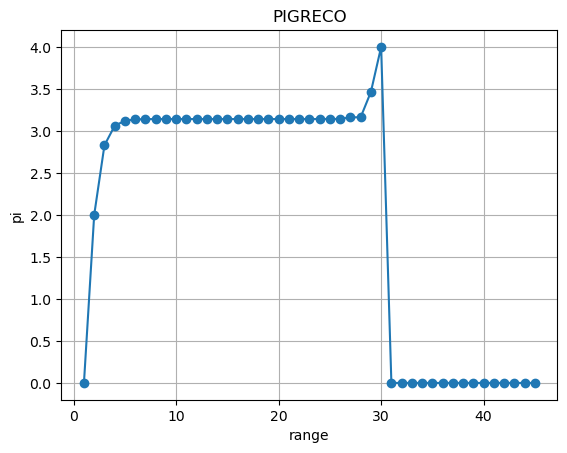

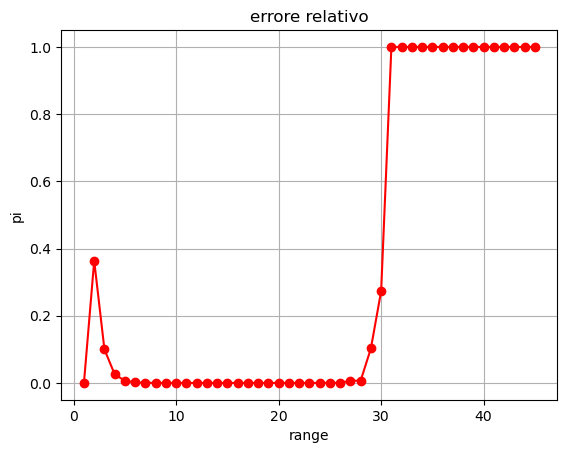

In [4]:
n = 45

b = np.zeros(n)
s = np.zeros(n)
p = np.zeros(n)
errRel = np.zeros(n)
b[0]=2
s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
    s[i]=np.sqrt((1.0-np.sqrt(1-s[i-1]**2))/2.0)
    errRel[i] = np.abs((p[i] - np.pi) / np.pi) 


plt.plot(range(1, n+1), p, marker = "o")
plt.grid(True)
plt.xlabel("range")
plt.ylabel("pi")
plt.title("PIGRECO")
plt.show()

plt.plot(range(1, n+1), errRel,'ro-')
plt.grid(True)
plt.xlabel("range")
plt.ylabel("pi")
plt.title("errore relativo")
plt.show()

## Esercizio 4   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



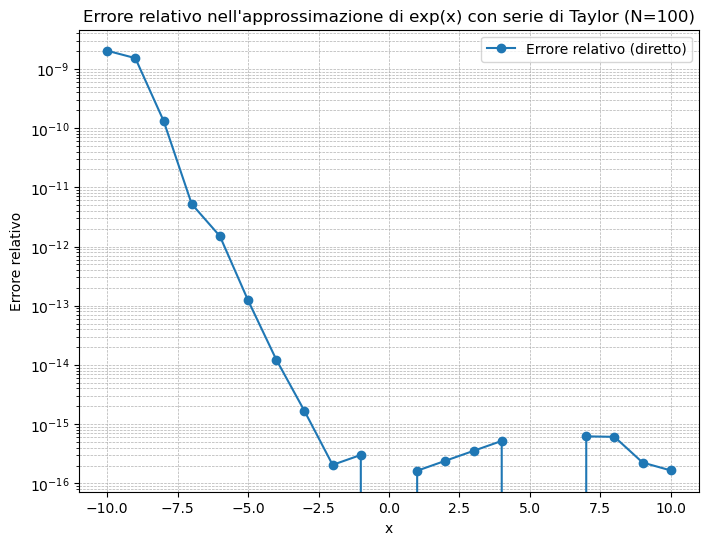

In [8]:
# Intervallo x da -10 a 10
x_values = np.arange(-10, 11)
N = 100  # Numero di termini della serie

# Funzione per calcolare l'approssimazione tramite serie di Taylor
def taylor_exp(x, N):
    result = 0.0
    term = 1.0  # x^0 / 0!
    for k in range(N):
        if k > 0:
            term *= x / k
        result += term
    return result

# Approssimazione con serie di Taylor (senza stabilizzazione)
approx_values = np.array([taylor_exp(x, N) for x in x_values])

# Valori esatti con numpy
true_values = np.exp(x_values)

# Errore relativo
relative_error = np.abs(approx_values - true_values) / np.abs(true_values)

# Grafico dell'errore relativo
plt.figure(figsize=(8,6))
plt.semilogy(x_values, relative_error, marker='o', linestyle='-', label="Errore relativo (diretto)")
plt.xlabel("x")
plt.ylabel("Errore relativo")
plt.title("Errore relativo nell'approssimazione di exp(x) con serie di Taylor (N=100)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


## Esercizio 5
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

## Esercizio 6
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


## Esercizio 7
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?




Si nota che al restringersi dell'intervallo in torno al punto x=2, 
in cui la funzione si annulla, si evidenzia l'instabilità dell'algoritmo 1
rispetto all' algoritmo di Horner che risulta più stabile. 
